In [1]:
%matplotlib inline
import matplotlib.cm as cm
from matplotlib.colors import Normalize   
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import matplotlib.transforms
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
# sns.set(font_scale=0.2)

In [2]:
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 10}

# from matplotlib import rc
# from matplotlib import rcParams
# rc('font', **font)

In [3]:
table_path = Path('/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/fit13/tables/')
product_path = Path('../../results')

In [4]:
# Fix region names, remove underscore
def fix_region_name(roi):
    roi = roi.replace('_', ' ')
    roi = ' '.join(roi.split(',')[::-1]).strip()
    return roi

# EDIT THIS --> PUT FIT TABLE PATH<br>
Get list of regions to average over for global

In [5]:
df = pd.read_csv(table_path / 'fit_table_reweighted.csv')
df['roi'] = df['roi'].apply(fix_region_name)

rois = list(df.roi.unique())

rois.remove('US')
rois.remove('AA Global')
## discard these if outliers
# rois.remove('France')
# rois.remove('Russia')
# rois.remove('Malaysia')
# rois.remove('Honduras')
# rois.remove('Senegal')
# rois.remove('Algeria')


# EDIT THIS --> change to the correct date name for latest week in data

In [6]:
# Add column for May 7th
#REPLACE May 7th WITH DATE FOR LATEST WEEK

# def add_latestwk(df, stats):
#     for stat in stats:
#         df['%s (May 24th)' % stat] = df.filter(regex=("%s \(w.*" % stat)).apply(lambda x: x.dropna().get(-1, None), axis=1)
#     return df

# def sort_nicely(l):
#     """ Sorts the given iterable in the way that is expected.
#     Required arguments:
#     l -- The iterable to be sorted.
#     """
#     convert = lambda text: int(text) if text.isdigit() else text
#     alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
#     return sorted(l, key=alphanum_key)

# df = add_latestwk(df, ['Rt', 'car', 'ifr'])

stats = ['Rt', 'car', 'ifr']
for stat in stats:
    print(stat)
    df[f'{stat} (May 24th)'] = 0
    for roi in rois:
        for wk in np.arange(17,0,-1):
    #         print(f"{stat} (week {wk})")
            if df.loc[df.roi==roi][f"{stat} (week {wk})"].notnull().values[0]:
                for q in df['quantile'].unique():
                    df.loc[(df.roi==roi)&(df['quantile']==q),[f'{stat} (May 24th)']] = df.loc[(df.roi==roi)&(df['quantile']==q),[f"{stat} (week {wk})"]].values
    #                 print(df.loc[(df.roi==roi)&(df['quantile']==q)]['Rt (May 24th)'].values)
                break



Rt
car
ifr


In [7]:
# df.loc[df.roi=='Iran']

In [8]:
df = df.set_index(['roi', 'quantile']).sort_index()

In [9]:
# def get_global(df):
#     # Compute global stats
# #     df = df.drop('AA Global', errors='ignore')
#     df.columns.name = 'param'
#     means = df.unstack('roi').loc['mean'].unstack('param')
#     weights = (1/df.unstack('roi').loc['std']**2).fillna(0).unstack('param')
#     global_mean = (means*weights).sum() / weights.sum()
#     global_sd = ((weights*((means - global_mean)**2)).sum()/weights.sum())**(1/2)
#     df.loc[('GLOBAL', 'mean'), :] = global_mean
#     df.loc[('GLOBAL', 'std'), :] = global_sd
#     for quantile in ['0.025', '0.25', '0.5', '0.75', '0.975']:
#         vals = df.unstack('roi').loc[quantile].unstack('param')
#         df.loc[('GLOBAL', quantile), :] = (vals*weights).sum() / weights.sum()
#     #df = df.sort_index()
#     #gl = df.loc['Global']
#     return df

# ### not certain but above function 
# ### had a miscount between number of elements vs number expected based on rois

# ###REPLACE MAY 7TH WITH DATE FROM ABOVE 

theta_ = ["R0", 
          "Rt (week 2)",
         "Rt (May 24th)",
          "car (week 0)", 
          "car (week 2)",
         "car (May 24th)",
         "ifr (week 0)", 
          "ifr (week 2)",
         "ifr (May 24th)",
         "q",
         "extra_std"]

# def get_global2(theta):
#     g_ = {}
#     for q in q_:
#         v = []
#         w = []
#         for roi in rois:
#             v.append(df.loc[(roi,q),theta])
#             w.append(1/(df.loc[(roi,'std'),theta]**2))
#             if np.isnan(w[-1]):
#                 del(v[-1],w[-1])
#         v = np.array(v)
#         w = np.array(w)
#         g = sum(v*w)/sum(w)
#         df.loc[('GLOBAL', q),theta] = g
#         g_[q] = g
#     return g_

def get_global3(theta):
    g_ = {}
    for q in q_:
        v = []
        w = []
        for roi in rois:
            v.append(df.loc[(roi,q),theta])
            w.append(df.loc[(roi,'mean'),'n_data_pts'])
            if np.isnan(w[-1]):
                del(v[-1],w[-1])
        v = np.array(v)
        w = np.array(w)
        g = sum(v*w)/sum(w)
        df.loc[('GLOBAL', q),theta] = g
        g_[q] = g
    return g_

def afun1(x):
    return '%s' % float('%.1g' %x)

def afun2(x):
    return '%s' % float('%.2g' %x)

# df = get_global(df)

# for quantile in ['0.025', '0.25', '0.5', '0.75', '0.975']:
# for i in df.loc[('GLOBAL', '0.5'), :].keys():
#     print(i)
#     print(df.loc[('GLOBAL', '0.5'), i])

q_ = ['0.025','0.25','0.5','0.75','0.975']

for theta in theta_:
    g_ = get_global3(theta)
    if theta[0]=='R':
        print(theta+' median: '+str(afun2(g_['0.5']))+' CI: ('+
          ','.join([str(afun2(g_['0.025'])),str(afun2(g_['0.975']))])+')\n')
    else:
        print(theta+' median: '+str(afun1(g_['0.5']))+' CI: ('+
          ','.join([str(afun1(g_['0.025'])),str(afun1(g_['0.975']))])+')\n')
    

R0 median: 4.4 CI: (2.0,9.7)

Rt (week 2) median: 3.5 CI: (1.7,7.8)

Rt (May 24th) median: 0.96 CI: (0.59,1.7)

car (week 0) median: 0.3 CI: (0.06,1.0)

car (week 2) median: 0.2 CI: (0.04,0.5)

car (May 24th) median: 0.2 CI: (0.05,0.6)

ifr (week 0) median: 0.008 CI: (0.0008,0.04)

ifr (week 2) median: 0.006 CI: (0.0008,0.02)

ifr (May 24th) median: 0.01 CI: (0.002,0.04)

q median: 0.2 CI: (0.01,1.0)

extra_std median: 1.0 CI: (1.0,1.0)



In [10]:
# Restrict ROIs for some analyses

dfo = pd.read_csv(table_path / 'fit_table_reweighted.csv')
dfo['roi'] = dfo['roi'].apply(fix_region_name)

rois = list(dfo.roi.unique())

roi_us = np.sort([i for i in rois if i[:2]=='US'])
# roi_other = np.sort([i for i in rois if i[:2]!='US'])
top25 = pd.read_csv(product_path / "top25.csv", index_col=0, header=None).index
top25 = top25.map(fix_region_name)
roi_other = sorted(list(top25) + ['China','Australia','Canada'])#,'Senegal','Malaysia','Honduras','Algeria'])
rois = ['GLOBAL']+ list(roi_other) + list(roi_us)  
rois.remove('US')
# rois.remove('AA Global')

df_top = df.loc[rois]
print("There are %d regions under consideration" % len(rois))

There are 83 regions under consideration


### Figure 2-4

In [11]:
def clean_df(df, stat):
    result = df[stat].unstack('quantile')
    return result

def box_vs_roi(df, stat, labl, sort=True, low=0.12, high=22, palette=None, ax=None, subtract=None):
    sns.set(rc={'ytick.left': True, 'xtick.bottom': True})
    if ax is None:
        fig = plt.figure(figsize=(15, 5))
    else:
        fig = plt.gcf()
    clean = clean_df(df, stat)
    clean = clean.iloc[:, :5] # Only quantiles
    if sort is True:
        clean = clean.sort_values('0.5', ascending=False)
    elif sort is not False:
        clean = clean.loc[sort]
    clean = clean.loc[['GLOBAL'] + list(clean.index.drop('GLOBAL'))]
    if subtract:
        clean2 = clean_df(df, subtract)
        clean2 = clean2.loc[clean.index]
        clean2 = clean2.iloc[:, :5] # Only quantiles
        diffs = np.log10(clean['0.5'] / clean2['0.5'])
#         diffs = (clean['0.5'] - clean2['0.5'])#np.log10(clean2['0.5'] / clean['0.5'])
        cmap = cm.seismic #cm.RdBu_r
        norm = Normalize(vmin=-1, vmax=1)
        palette = [cmap(norm(diff)) for diff in diffs]
    else:
        palette = None
    ax = sns.boxplot(data=clean.T, whis=99, ax=ax, palette=palette)
    for i, box in enumerate(ax.artists):
        box.set_edgecolor('black')
        if palette is None:
            box.set_facecolor('white')
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels, rotation=70, fontsize=10);
    ax.set_yscale('log')
    if True:#'R' in stat:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: "%d"%x if x>=1 else '%.1g'%x))
        ax.yaxis.set_minor_formatter(FuncFormatter(lambda x,_: "%d"%x if x in [2, 5] else ''))
    dx = 8/72.; dy = 0/72. 
    ax.margins(x=0.01, y=0.01)
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        label.set_transform(label.get_transform() + offset)
    ax.set_xlim(-1, len(clean))
    ax.set_ylim(low, high)
    ax.set_xlabel('')
    ax.set_ylabel(labl, fontsize=18);
    return list(clean.index)

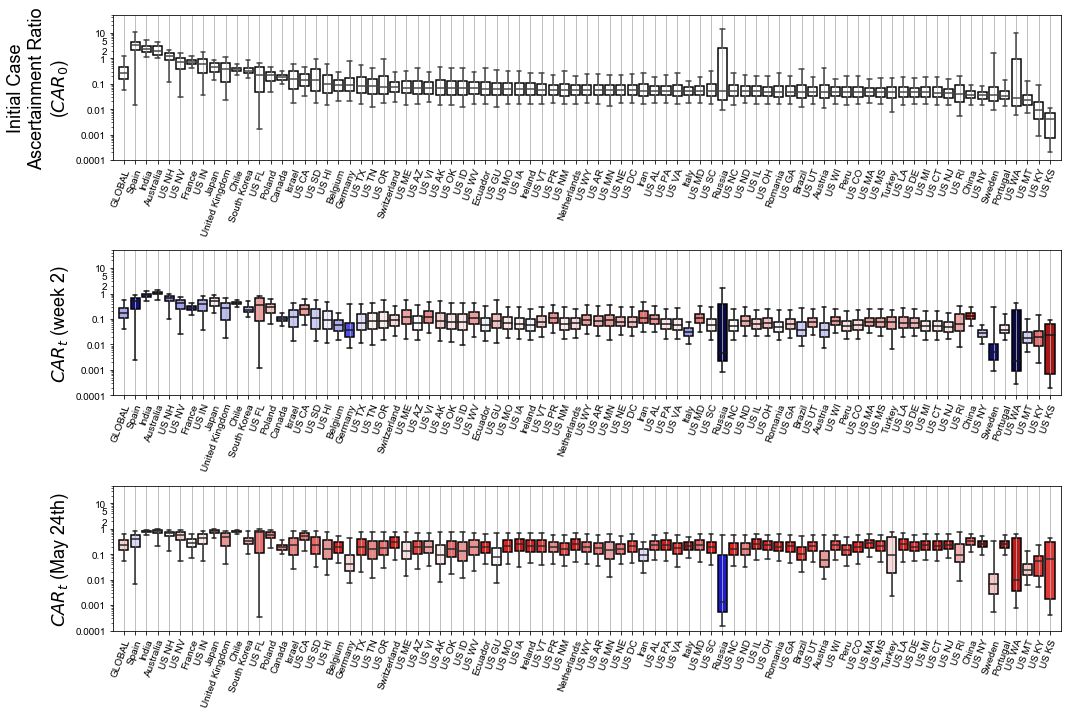

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
rois = box_vs_roi(df_top, 'car (week 0)', 'Initial Case\nAscertainment Ratio\n($CAR_0$)', 
                  ax=ax[0], low=1e-4, high=50,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, 'car (week 2)', '$CAR_t$ (week 2)', low=1e-4, high=50, 
           ax=ax[1], subtract='car (week 0)', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, 'car (May 24th)', '$CAR_t$ (May 24th)', low=1e-4, high=50, 
           ax=ax[2], subtract='car (week 2)', sort=rois);
ax[2].xaxis.grid(True)
plt.tight_layout()
plt.savefig(product_path / 'Fig_car0_2_may24.png', dpi=400)

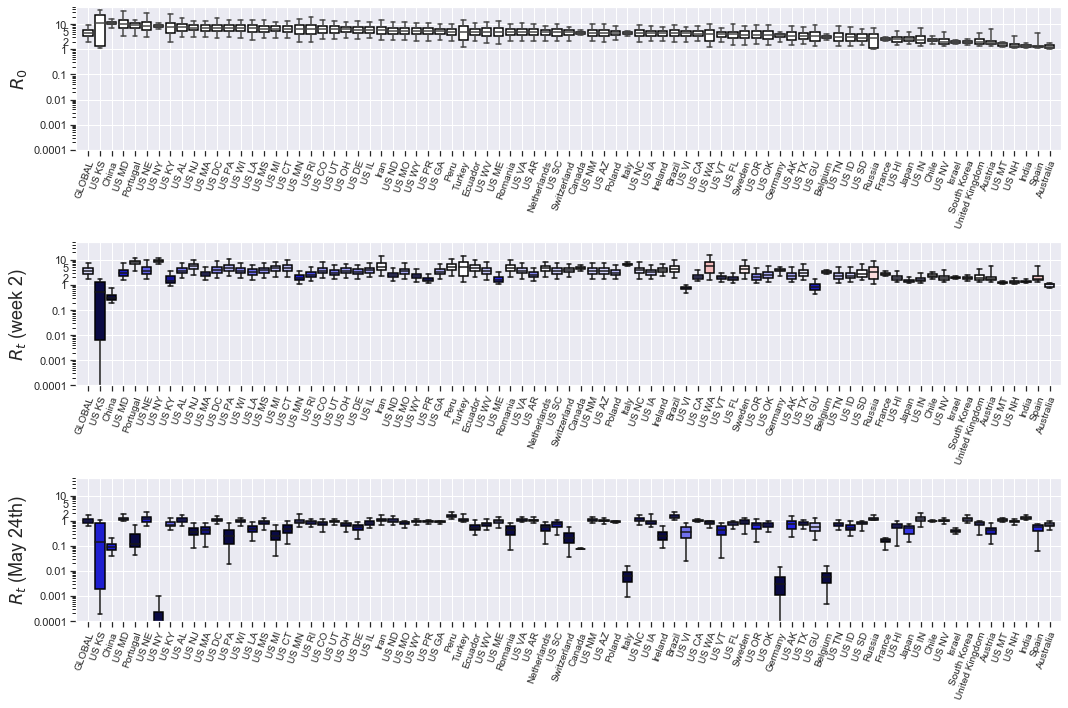

In [13]:
# fig, ax = plt.subplots(2, 1, figsize=(15, 10))
# rois = box_vs_roi(df_top, 'R0', '$R_0$', ax=ax[0], low=1e-3, high=0.5e2);
# ax[0].xaxis.grid(True)
# box_vs_roi(df_top, 'Rt (May 17th)', '$R_t$\nMay 17th', low=1e-3, high=0.5e2, ax=ax[1], subtract='R0', sort=rois);
# ax[1].xaxis.grid(True)

# plt.tight_layout()

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
rois = box_vs_roi(df_top, 'R0', '$R_0$', 
                  ax=ax[0], low=1e-4, high=0.5e2,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, 'Rt (week 2)', '$R_t$ (week 2)', low=1e-4, high=0.5e2, 
           ax=ax[1], subtract='R0', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, 'Rt (May 24th)', '$R_t$ (May 24th)', low=1e-4, high=0.5e2, 
           ax=ax[2], subtract='Rt (week 2)', sort=rois);
ax[2].xaxis.grid(True)
plt.tight_layout()

plt.savefig(product_path / 'Fig_R0_2_may24.png', dpi=400)

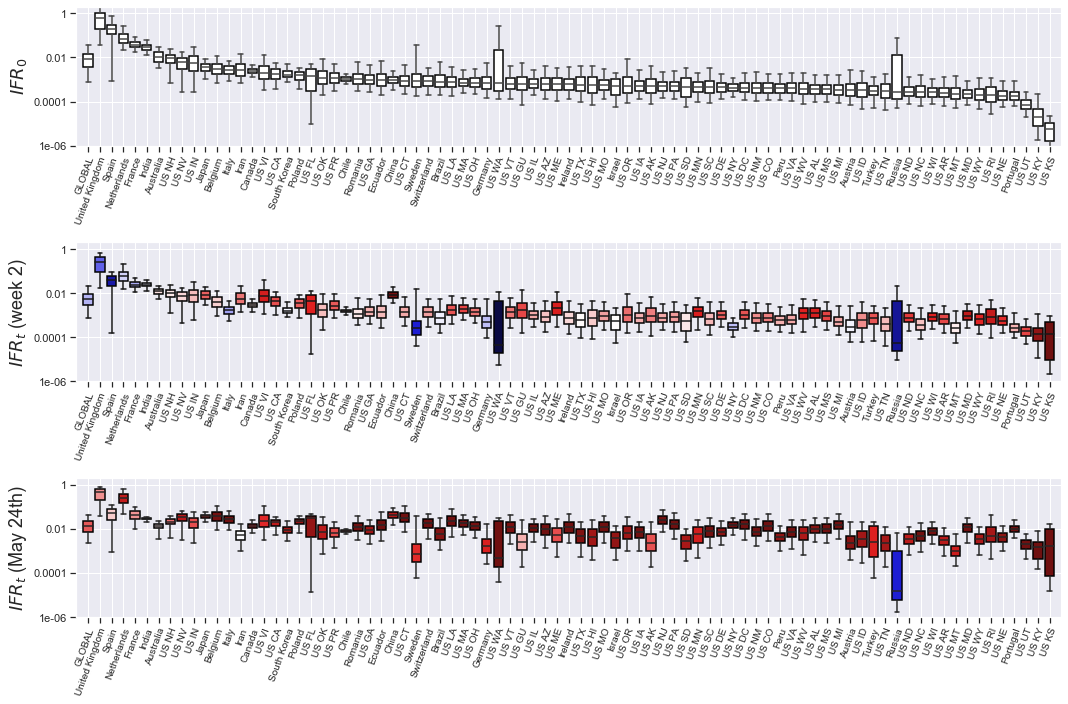

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
rois = box_vs_roi(df_top, 'ifr (week 0)', '$IFR_0$', 
                  ax=ax[0], low=1e-6, high=2,);
ax[0].xaxis.grid(True)

box_vs_roi(df_top, 'ifr (week 2)', '$IFR_t$ (week 2)', low=1e-6, high=2, 
           ax=ax[1], subtract='ifr (week 0)', sort=rois);
ax[1].xaxis.grid(True)

box_vs_roi(df_top, 'ifr (May 24th)', '$IFR_t$ (May 24th)', low=1e-6, high=2, 
           ax=ax[2], subtract='ifr (week 2)', sort=rois);
ax[2].xaxis.grid(True)
plt.tight_layout()
plt.savefig(product_path / 'Fig_ifr0_2_may24.png', dpi=400)

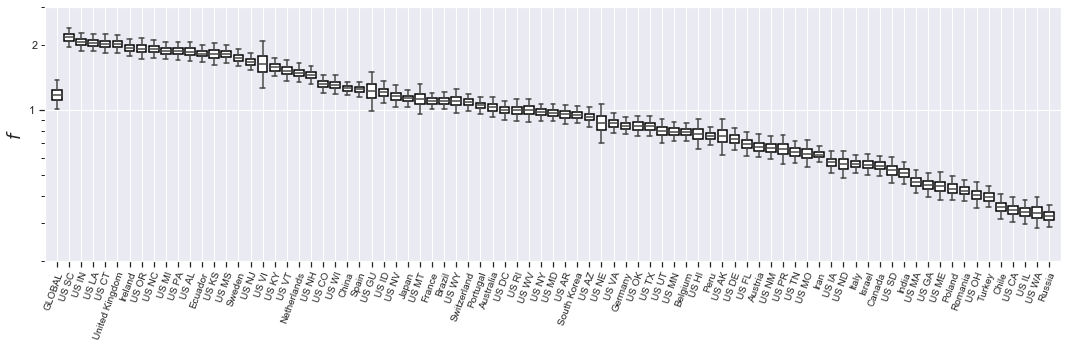

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

rois = box_vs_roi(df_top, 'extra_std', '$f$', 
                  ax=ax, low=0.2, high=3,);
ax.xaxis.grid(True)

# box_vs_roi(df_top, 'Rt (week 2)', '$R_t$ (week 2)', low=1e-4, high=0.5e2, 
#            ax=ax[1], subtract='R0', sort=rois);
# ax[1].xaxis.grid(True)

# box_vs_roi(df_top, 'Rt (May 24th)', '$R_t$ (May 24th)', low=1e-4, high=0.5e2, 
#            ax=ax[2], subtract='Rt (week 2)', sort=rois);
# ax[2].xaxis.grid(True)
plt.tight_layout()

plt.savefig(product_path / 'Fig_f.png', dpi=400)

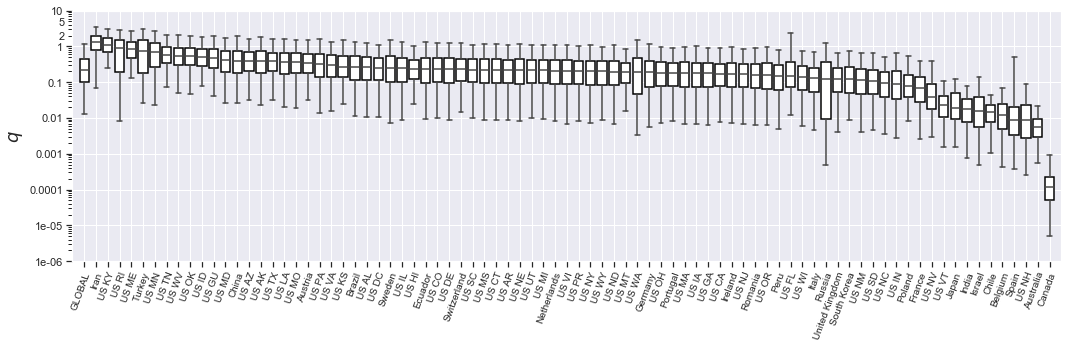

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rois = box_vs_roi(df_top, 'q', '$q$', 
                  ax=ax, low=1e-6, high=10,);
ax.xaxis.grid(True)

plt.tight_layout()

plt.savefig(product_path / 'Fig_q.png', dpi=400)